# Chapter 4 snippets

### snippet 4.0

Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking

snippet 4.1

No attempt has been made to condense this too fewer lines of code

In [2]:
noofsteps = 20;
noofwalks = 15;
pos = Array{Float64, 2}(rand(Uniform(-1, 1), noofsteps, noofwalks));
pos[1, :] = zeros(noofwalks);
csum = cumsum(pos, dims=1);

f = Plots.font("DejaVu Sans", 6)
mx = minimum(csum) * 0.9

-4.373682968583594

Plot and annotate the random walks

In [3]:
p1 = plot(csum, leg=false, title="Random walks ($(noofwalks))")
plot!(p1, csum[:, Int(floor(noofwalks/2))], leg=false, title="Random walks ($(noofwalks))", color=:black)
plot!(p1, [5], seriestype="vline")
annotate!(5, mx, text("step 4", f, :left))
plot!(p1, [9], seriestype="vline")
annotate!(9, mx, text("step 8", f, :left))
plot!(p1, [17], seriestype="vline")
annotate!(17, mx, text("step 16", f, :left))
p2 = Vector{Plots.Plot{Plots.GRBackend}}(undef, 3)

3-element Array{Plots.Plot{Plots.GRBackend},1}:
 #undef
 #undef
 #undef

Generate 3 plots of densities at 3 different step numbers (4, 8 and 16)

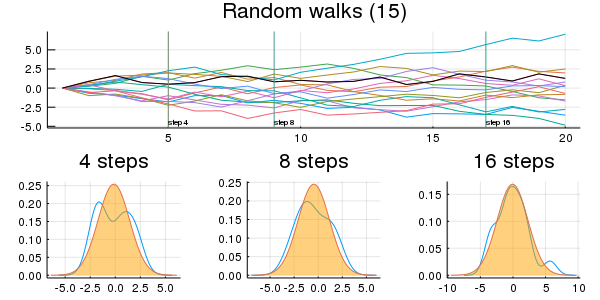

In [4]:
plt = 1
for step in [4, 8, 16]
  indx = step + 1 # We aadded the first line of zeros
  global plt
  fit = fit_mle(Normal, csum[indx, :])
  x = (fit.μ-4*fit.σ):0.01:(fit.μ+4*fit.σ)
  p2[plt] = density(csum[indx, :], legend=false, title="$(step) steps")
  plot!( p2[plt], x, pdf.(Normal( fit.μ , fit.σ ) , x ), fill=(0, .5,:orange))
  plt += 1
end
p3 = plot(p2..., layout=(1, 3))

plot(p1, p3, layout=(2,1))

snippet 4.2

In [5]:
prod(1 .+ rand(Uniform(0, 0.1), 10))

1.6512684749169781

snippet 4.3

In [6]:
growth = [prod(1 .+ rand(Uniform(0, 0.1), 10)) for i in 1:10000];
fit = fit_mle(Normal, growth)
plot(Normal(fit.μ , fit.σ ), fill=(0, .5,:orange), lab="Normal distribution")
density!(growth, lab="'sample' distribution")
savefig("s4_3.pdf")

snippet 4.4

In [7]:
big = [prod(1 .+ rand(Uniform(0, 0.5), 12)) for i in 1:10000];
small = [prod(1 .+ rand(Uniform(0, 0.01), 12)) for i in 1:10000];
fitb = fit_mle(Normal, big)
fits = fit_mle(Normal, small)
p1 = plot(Normal(fitb.μ , fitb.σ ), lab="Big normal distribution", fill=(0, .5,:orange))
p2 = plot(Normal(fits.μ , fits.σ ), lab="Small normal distribution", fill=(0, .5,:orange))
density!(p1, big, lab="'big' distribution")
density!(p2, small, lab="'small' distribution")
plot(p1, p2, layout=(1, 2))
savefig("s4_4.pdf")

snippet 4.5

In [8]:
log_big = [log(prod(1 .+ rand(Uniform(0, 0.5), 12))) for i in 1:10000];
fit = fit_mle(Normal, log_big)
plot(Normal(fit.μ , fit.σ ), fill=(0, .5,:orange), lab="Normal distribution")
density!(log_big, lab="'sample' distribution")
savefig("s4_5.pdf")

snippet 4.6

Grid of 1001 steps

In [9]:
p_grid = range(0, step=0.001, stop=1)

0.0:0.001:1.0

all priors = 1.0

In [10]:
prior = ones(length(p_grid))

1001-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮  
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

Binomial pdf

In [11]:
likelihood = [pdf(Binomial(9, p), 6) for p in p_grid]

1001-element Array{Float64,1}:
 0.0                   
 8.374825191600018e-17 
 5.3438084689919926e-15
 6.068652771862778e-14 
 3.399517250519025e-13 
 1.2929107734374954e-12
 3.848982544705552e-12 
 9.676432504149003e-12 
 2.1495830280142858e-11
 4.344655104237097e-11 
 ⋮                     
 4.098446591204723e-5  
 2.7622876204442173e-5 
 1.7500535729793716e-5 
 1.0188911348240822e-5 
 5.248259379330843e-6  
 2.227480958032322e-6  
 6.639762126411521e-7  
 8.34972583212597e-8   
 0.0                   

As Uniform priar has been used, unstandardized posterior is equal to likelihood

In [12]:
posterior = likelihood .* prior

1001-element Array{Float64,1}:
 0.0                   
 8.374825191600018e-17 
 5.3438084689919926e-15
 6.068652771862778e-14 
 3.399517250519025e-13 
 1.2929107734374954e-12
 3.848982544705552e-12 
 9.676432504149003e-12 
 2.1495830280142858e-11
 4.344655104237097e-11 
 ⋮                     
 4.098446591204723e-5  
 2.7622876204442173e-5 
 1.7500535729793716e-5 
 1.0188911348240822e-5 
 5.248259379330843e-6  
 2.227480958032322e-6  
 6.639762126411521e-7  
 8.34972583212597e-8   
 0.0                   

Scale posterior such that they become probabilities

In [13]:
posterior = posterior / sum(posterior)

1001-element Array{Float64,1}:
 0.0                   
 8.3748251915414015e-19
 5.3438084689545903e-17
 6.068652771820303e-16 
 3.3995172504952317e-15
 1.2929107734284463e-14
 3.8489825446786124e-14
 9.676432504081277e-14 
 2.1495830279992406e-13
 4.3446551042066883e-13
 ⋮                     
 4.0984465911760373e-7 
 2.762287620424884e-7  
 1.7500535729671228e-7 
 1.0188911348169508e-7 
 5.24825937929411e-8   
 2.2274809580167314e-8 
 6.639762126365048e-9  
 8.349725832067529e-10 
 0.0                   

Sample using the computed posterior values as weights
In this example we keep the number of samples equal to the length of p_grid,
but that is not required.

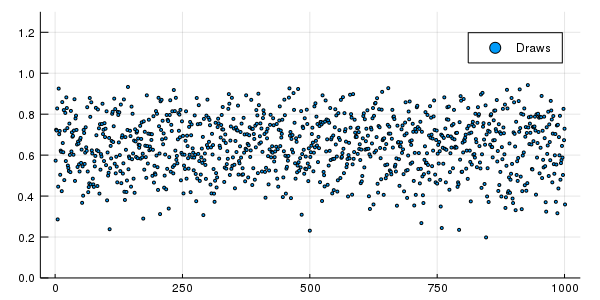

In [14]:
samples = sample(p_grid, Weights(posterior), length(p_grid))

p = Vector{Plots.Plot{Plots.GRBackend}}(undef, 2)

p[1] = scatter(1:length(p_grid), samples, markersize = 2, ylim=(0.0, 1.3), lab="Draws")

analytical calculation

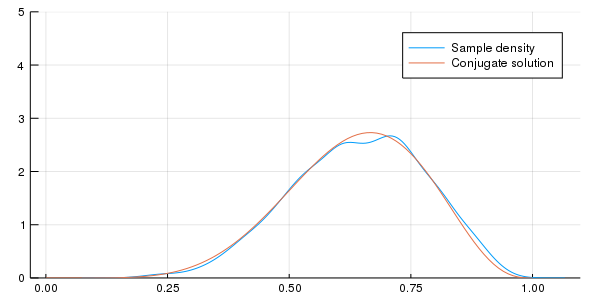

In [15]:
w = 6
n = 9
x = 0:0.01:1
p[2] = density(samples, ylim=(0.0, 5.0), lab="Sample density")
p[2] = plot!( x, pdf.(Beta( w+1 , n-w+1 ) , x ), lab="Conjugate solution")

quadratic approximation

In [16]:
plot!( p[2], x, pdf.(Normal( 0.67 , 0.16 ) , x ), lab="Normal approximation", fill=(0, .5,:orange))
plot(p..., layout=(1, 2))
savefig("s4_6.pdf")

snippet 4.7

In [17]:
howell1 = CSV.read(joinpath(dirname(Base.pathof(StatisticalRethinking)), "..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0
6,163.83,62.9926,35.0,1
7,149.225,38.2435,32.0,0
8,168.91,55.48,27.0,1
9,147.955,34.8699,19.0,0


*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*